## Augmenting

In [1]:
!git clone https://github.com/ChronoStellar/Automatic-License-Plate-Recognition

Cloning into 'Automatic-License-Plate-Recognition'...
remote: Enumerating objects: 1045, done.
remote: Counting objects: 100% (1045/1045), done.
remote: Compressing objects: 100% (1041/1041), done.
remote: Total 1045 (delta 3), reused 1030 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (1045/1045), 19.96 MiB | 17.82 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [2]:
PATH = '/content/Automatic-License-Plate-Recognition/dataset/hogDataset/raw/deargod'

In [3]:
import os
import matplotlib.pyplot as plt

In [5]:
counter = {}
total = 0
for i in os.listdir(PATH):
  count = 0
  for filename in os.listdir(os.path.join(PATH, i)):
    count+=1
  counter[i]=count
  total += count

print(total)
print(counter)

661
{'D': 22, '2': 31, 'B': 27, 'C': 15, 'Z': 9, 'A': 19, 'X': 6, '6': 22, 'N': 18, 'V': 10, 'I': 14, 'W': 10, 'O': 18, 'E': 11, '3': 25, '5': 36, 'H': 22, 'G': 8, 'K': 17, 'L': 9, 'Y': 10, '7': 27, 'R': 16, 'Q': 22, 'M': 8, '8': 30, 'T': 11, 'U': 16, 'J': 8, '0': 33, '9': 26, '4': 31, 'F': 23, 'P': 8, 'S': 10, '1': 33}


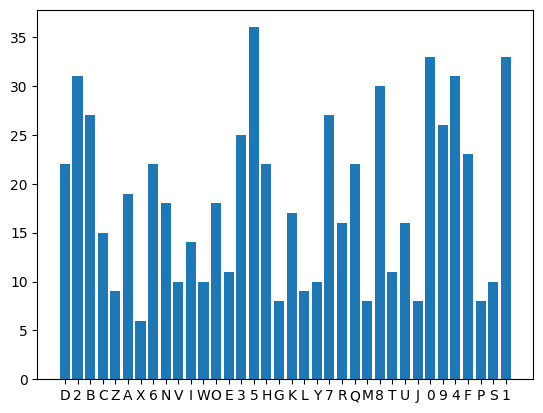

In [8]:
data = list(counter.keys())
values = list(counter.values())

plt.bar(data, values)
plt.show()

In [4]:
import os
import cv2
import numpy as np
import random

In [5]:
# Paths
OUTPUT_PATH = "augmented/dataset"  # Path to save augmented images
os.makedirs(OUTPUT_PATH, exist_ok=True)

In [6]:
# Augmentation functions
def rotate_image(image, angle_range=5):
    angle = random.uniform(-angle_range, angle_range)
    h, w = image.shape[:2]
    M = cv2.getRotationMatrix2D((w // 2, h // 2), angle, 1.0)
    return cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)

def translate_image(image, max_shift=6):
    h, w = image.shape[:2]
    tx, ty = random.randint(-max_shift, max_shift), random.randint(-2*max_shift, 2*max_shift)
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(image, M, (w, h), borderMode=cv2.BORDER_REFLECT)

def scale_image(image, scale_range=(0.9, 1.1)):
    scale = random.uniform(*scale_range)
    h, w = image.shape[:2]
    resized = cv2.resize(image, (int(w * scale), int(h * scale)))
    if scale < 1.0:
        # Center pad for smaller images
        delta_w = w - resized.shape[1]
        delta_h = h - resized.shape[0]
        return cv2.copyMakeBorder(resized, delta_h // 2, delta_h - delta_h // 2, delta_w // 2, delta_w - delta_w // 2, cv2.BORDER_REFLECT)
    else:
        # Center crop for larger images
        start_x, start_y = (resized.shape[1] - w) // 2, (resized.shape[0] - h) // 2
        return resized[start_y:start_y + h, start_x:start_x + w]

def adjust_brightness(image, brightness_range=0.3):
    factor = 1.0 + random.uniform(-brightness_range, brightness_range)
    image = cv2.convertScaleAbs(image, alpha=factor, beta=0)
    return image

def add_gaussian_noise(image, std_dev=10):
    noise = np.random.normal(0, std_dev, image.shape).astype(np.float32)
    noisy_image = cv2.addWeighted(image.astype(np.float32), 1, noise, 1, 0).astype(np.uint8)
    return noisy_image

def elastic_distortion(image, alpha=2, sigma=0.2):
    random_state = np.random.RandomState(None)
    shape = image.shape[:2]
    dx = (random_state.rand(*shape) * 2 - 1) * alpha
    dy = (random_state.rand(*shape) * 2 - 1) * alpha
    x, y = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]))
    x = np.clip(x + dx, 0, shape[1] - 1).astype(np.float32)
    y = np.clip(y + dy, 0, shape[0] - 1).astype(np.float32)
    distorted_image = cv2.remap(image, x, y, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)
    return distorted_image

In [7]:
import itertools

# Define a list of all possible augmentation functions
augmentations = [rotate_image, translate_image, scale_image, adjust_brightness, add_gaussian_noise, elastic_distortion]

# Now, iterate through each folder and apply combinations of augmentations
for folder in os.listdir(PATH):
    folder_path = os.path.join(PATH, folder)
    output_folder_path = os.path.join(OUTPUT_PATH, folder)
    os.makedirs(output_folder_path, exist_ok=True)

    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        image = cv2.imread(file_path)
        if image is None:
            continue  # Skip non-image files

        # Apply combinations of augmentations (e.g., pairs or triples of augmentations)
        for combination in itertools.combinations(augmentations, 3):  # Choose 3 for example, can increase/decrease
            augmented_image = image.copy()
            for aug in combination:
                augmented_image = aug(augmented_image)
            # Save with a unique name for each combination
            new_filename = f"{os.path.splitext(filename)[0]}_aug_{'_'.join([str(aug.__name__) for aug in combination])}.jpg"
            cv2.imwrite(os.path.join(output_folder_path, new_filename), augmented_image)


In [20]:
counter_aug = {}
total_aug = 0
OUTPUT_PATH = '/content/augmented/dataset'

print(OUTPUT_PATH)
for i in os.listdir(OUTPUT_PATH):
  # print(i)
  count = 0
  for filename in os.listdir(os.path.join(OUTPUT_PATH, i)):
    # print(filename)
    count+=1
  counter_aug[i]=count
  total_aug += count

/content/augmented/dataset


13220
{'D': 440, '2': 620, 'B': 540, 'C': 300, 'Z': 180, 'A': 380, 'X': 120, '6': 440, 'N': 360, 'V': 200, 'I': 280, 'W': 200, 'O': 360, 'E': 220, '3': 500, '5': 720, 'H': 440, 'G': 160, 'K': 340, 'L': 180, 'Y': 200, '7': 540, 'R': 320, 'Q': 440, 'M': 160, '8': 600, 'T': 220, 'U': 320, 'J': 160, '0': 660, '9': 520, '4': 620, 'F': 460, 'P': 160, 'S': 200, '1': 660}


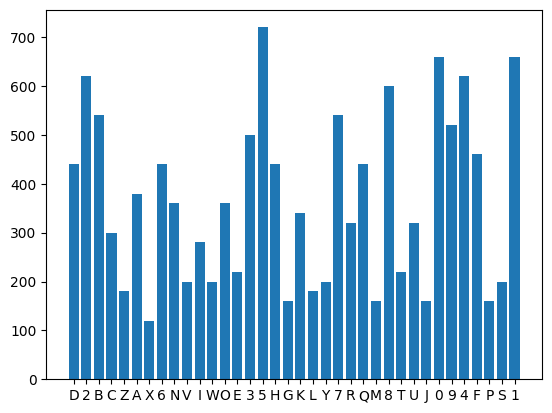

In [22]:
print(total_aug)
print(counter_aug)

data = list(counter_aug.keys())
values = list(counter_aug.values())

plt.bar(data, values)
plt.show()

In [12]:
len(os.listdir('/content/augmented/dataset'))

36

In [54]:
import zipfile
import os

# Define the path to the directory you want to zip
dir_path = '/content/augmented/dataset'

# Define the path to the output zip file
zip_path = '/content/output.zip'

# Create a ZipFile object
with zipfile.ZipFile(zip_path, 'w') as zip_file:
    # Walk through the directory and add files to the zip
    for root, dirs, files in os.walk(dir_path):
        for file in files:
            file_path = os.path.join(root, file)
            rel_path = os.path.relpath(file_path, start=os.path.dirname(dir_path))
            zip_file.write(file_path, rel_path)

print(f"Zip file created at {zip_path}")

Zip file created at /content/output.zip


## train

In [23]:
import numpy as np
import os
from skimage.feature import hog
import joblib
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from google.colab import userdata

In [25]:
train_dir = r'/content/augmented/dataset/'
labels_list = [i for i in os.listdir(train_dir)]
pathimg = [os.listdir(train_dir + i) for i in labels_list]

In [26]:
features = []
labels = []
for i,j in enumerate(zip(pathimg,labels_list)):
  imgs,label = j
  for img in imgs:
      img = cv2.imread(train_dir+label+'/'+img)
      img_res=cv2.resize(img,(64,128),interpolation=cv2.INTER_AREA)
      img_gray= cv2.cvtColor(img_res,cv2.COLOR_BGR2GRAY)
      hog_img= hog(img_gray,orientations=9,pixels_per_cell=(8,8), cells_per_block=(1, 1))
      features.append(hog_img)
      labels.append(label)

In [27]:
print(len(pd.DataFrame(np.array(features))))
print(len(pd.DataFrame(np.array(labels))))

13220
13220


In [28]:
df = pd.DataFrame(np.array(features))
df['target'] = labels
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1143,1144,1145,1146,1147,1148,1149,1150,1151,target
0,0.345896,0.345896,0.345896,0.345896,0.345896,0.345896,0.345896,0.206998,0.345896,0.345870,...,0.362088,0.362088,0.362088,0.362088,0.362088,0.362088,0.234384,0.362088,0.165262,D
1,0.491965,0.472369,0.127588,0.025001,0.184051,0.000000,0.000000,0.491965,0.491965,0.347152,...,0.408713,0.200433,0.347598,0.273517,0.408713,0.222424,0.408713,0.215716,0.408713,D
2,0.344235,0.246531,0.360848,0.360848,0.360848,0.360848,0.360848,0.347016,0.221918,0.387625,...,0.348407,0.329467,0.348407,0.348407,0.348407,0.348407,0.204303,0.348407,0.348407,D
3,0.360583,0.360583,0.278014,0.360583,0.360583,0.360583,0.360583,0.112114,0.360583,0.353471,...,0.388470,0.388470,0.388470,0.388470,0.383293,0.211843,0.225127,0.054624,0.388470,D
4,0.388851,0.388851,0.388851,0.256574,0.090805,0.176574,0.372450,0.388851,0.388851,0.350351,...,0.363422,0.363422,0.363422,0.363422,0.363422,0.195893,0.192607,0.363422,0.363422,D


In [29]:
df['target'].unique()

array(['D', '2', 'B', 'C', 'Z', 'A', 'X', '6', 'N', 'V', 'I', 'W', 'O',
       'E', '3', '5', 'H', 'G', 'K', 'L', 'Y', '7', 'R', 'Q', 'M', '8',
       'T', 'U', 'J', '0', '9', '4', 'F', 'P', 'S', '1'], dtype=object)

<Axes: xlabel='target', ylabel='count'>

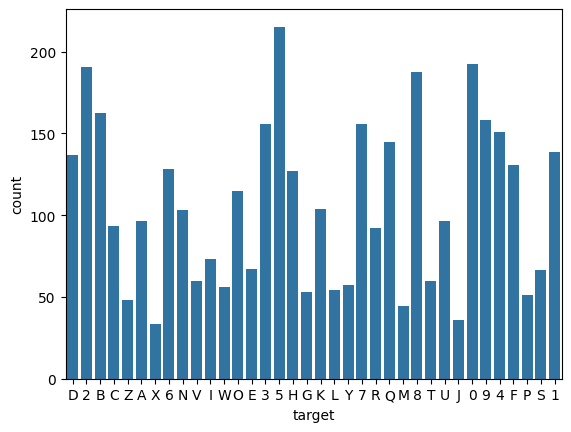

In [30]:
sns.countplot(x='target', data=df)

In [31]:
x = np.array(df.iloc[:,:-1])
y = np.array(df['target'])

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.20,
                                                    random_state=42)

In [33]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
sm_x,sm_y=sm.fit_resample(x_train, y_train)

<Axes: xlabel='target', ylabel='count'>

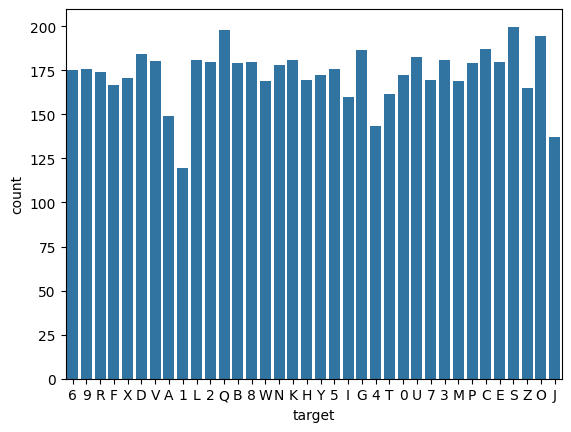

In [34]:
bal_df = pd.DataFrame(sm_x)
bal_df['target']=pd.DataFrame(sm_y)
sns.countplot(x='target', data=bal_df)

In [35]:
bal_df['target'].value_counts()

,count
target,
6,587
9,587
I,587
G,587
4,587
T,587
0,587
U,587
7,587


In [36]:
lreg = LogisticRegression()
clf=lreg.fit(sm_x, sm_y)
y_pred = clf.predict(x_test)
print('Accuracy {:.2f}'.format(clf.score(x_test, y_test)))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy 0.88
              precision    recall  f1-score   support

           0       0.60      0.63      0.61       126
           1       0.89      0.93      0.91       144
           2       0.95      0.99      0.97       123
           3       0.89      0.86      0.88       103
           4       0.92      0.94      0.93       110
           5       0.93      0.98      0.96       133
           6       0.92      0.88      0.90        88
           7       0.88      0.95      0.91        98
           8       0.92      0.89      0.91       135
           9       0.96      0.97      0.96       112
           A       0.90      0.88      0.89        86
           B       0.87      0.84      0.85       111
           C       0.91      0.89      0.90        57
           D       0.73      0.83      0.78        93
           E       0.77      0.89      0.83        27
           F       0.95      0.89      0.92       112
           G       0.89      0.93      0.91        27
           H 

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

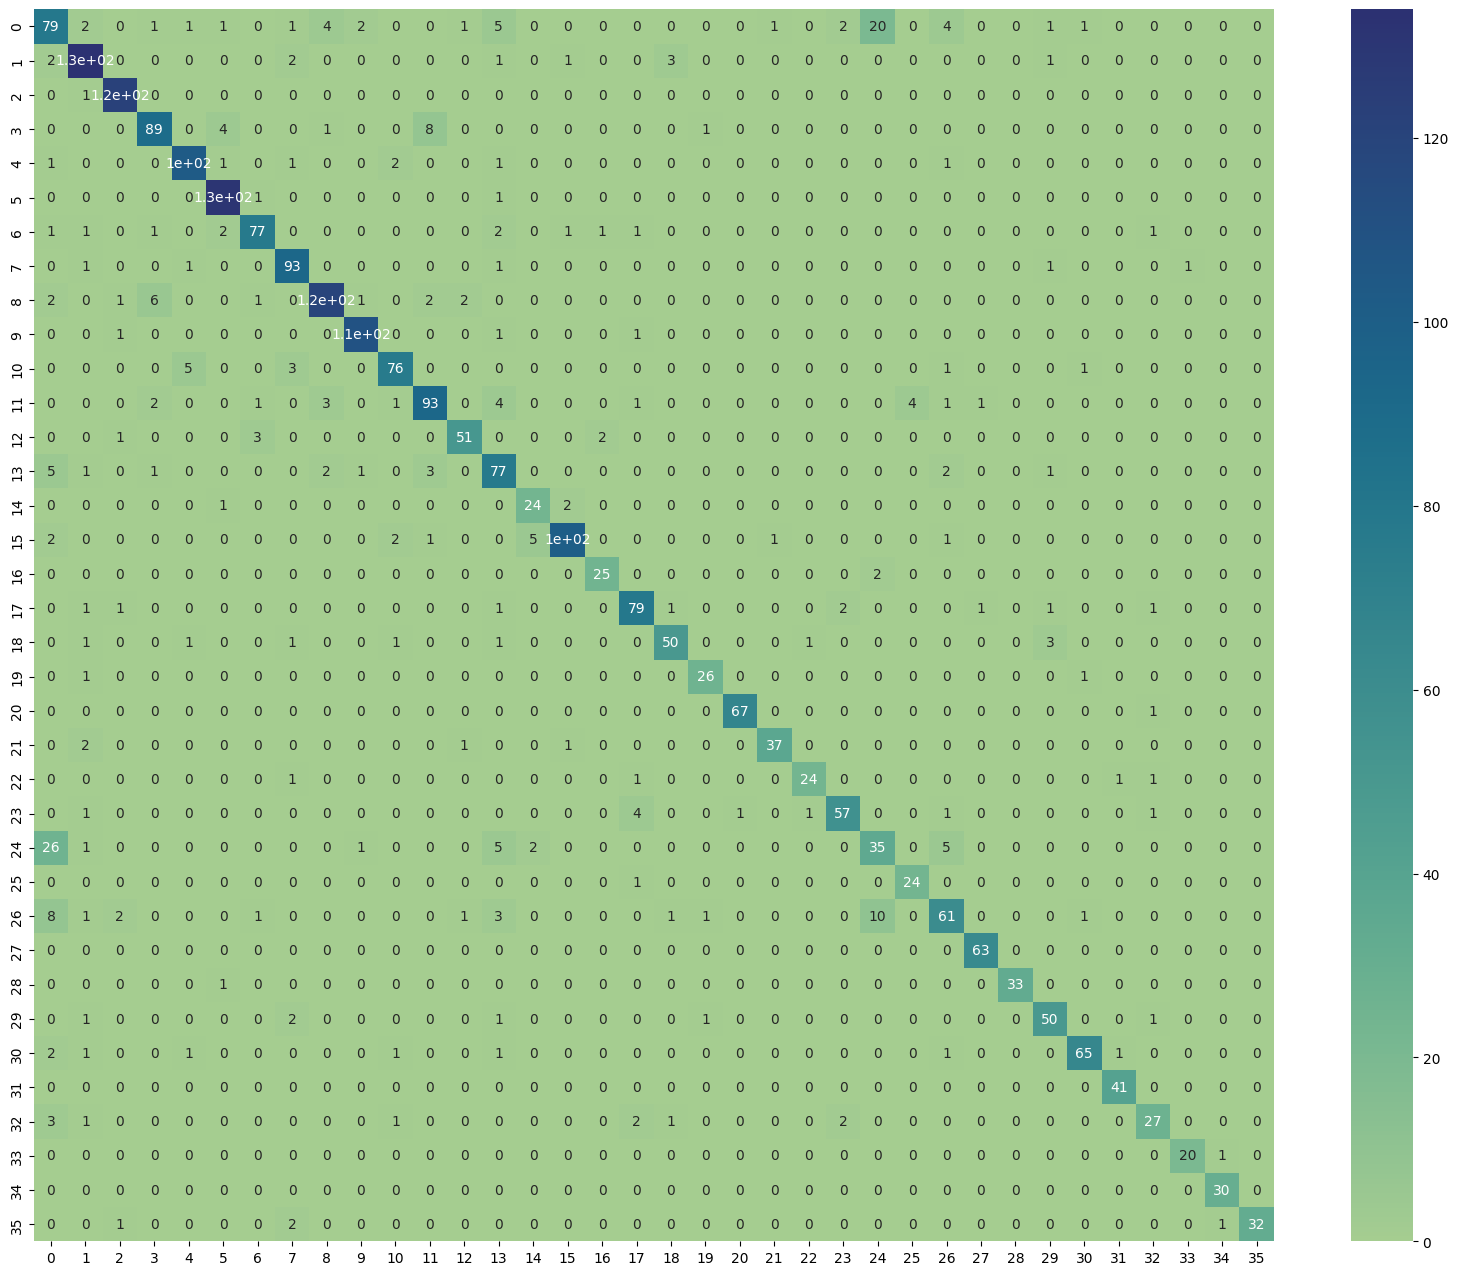

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,16))
sns.heatmap(cm, cmap='crest', annot=True)
plt.show()

In [39]:
joblib.dump(clf, r'hog_lreg_model_4.pkl')

['hog_lreg_model_4.pkl']

In [43]:
clf = joblib.load("hog_lreg_model_4.pkl")

In [50]:
def ocr(PATH):
    im = cv2.imread(PATH)
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    ret, im_th = cv2.threshold(im_gray, 120, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    ctrs, hier = cv2.findContours(im_th, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    bboxes = [cv2.boundingRect(c) for c in ctrs]
    sorted_bboxes = sorted(bboxes, key=lambda b: b) # Sort by x-coordinate

    plate_char = []
    image_height, image_width = im.shape[:2]
    height_threshold = image_height * 0.3
    width_threshold = image_width * 0.3

    for num, i_bboxes in enumerate(sorted_bboxes):
        [x, y, w, h] = i_bboxes
        if h > height_threshold and w < width_threshold:
            cv2.rectangle(im, (x, y), (x + w, y + h), (0, 255, 0), 1)
            roi = im_gray[y:y + h, x:x + w]
            roi = cv2.resize(roi, (64, 128), interpolation=cv2.INTER_AREA)
            roi_hog_fd = hog(roi, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(1, 1))
            nbr = clf.predict(np.array([roi_hog_fd]))
            cv2.putText(im, str(nbr[0]), (x, y + h), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 200, 250), 3)
            plate_char.append(str(nbr[0]))
    cv2_imshow(im)

    return ''.join(plate_char)

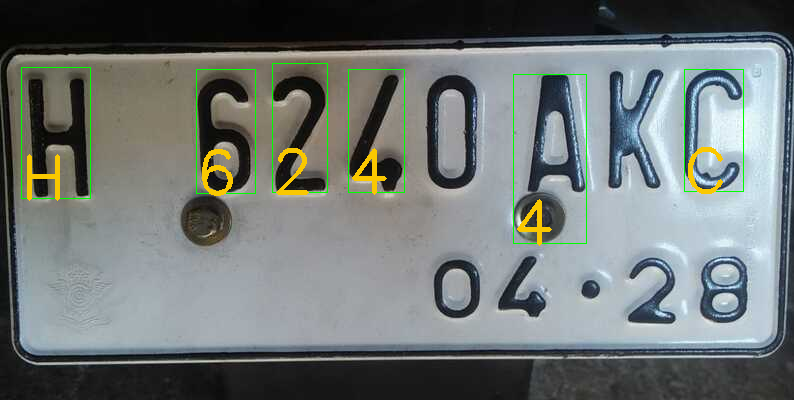

'H6244C'

In [51]:
ocr('/content/Automatic-License-Plate-Recognition/dataset/test/H6240AKC.jpg')

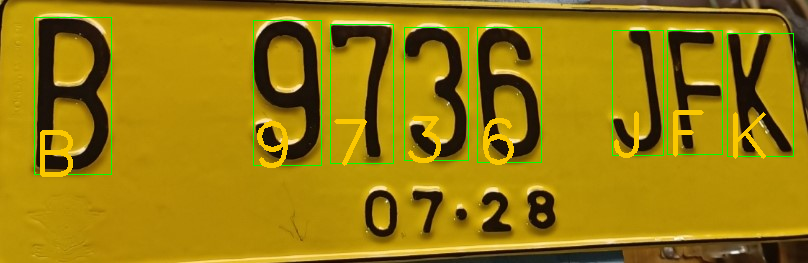

B9736JFK


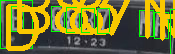

DB8837NR7


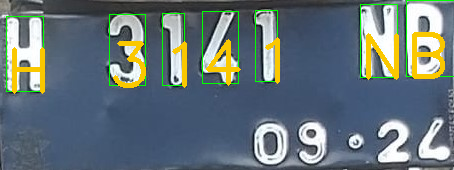

H3141NB


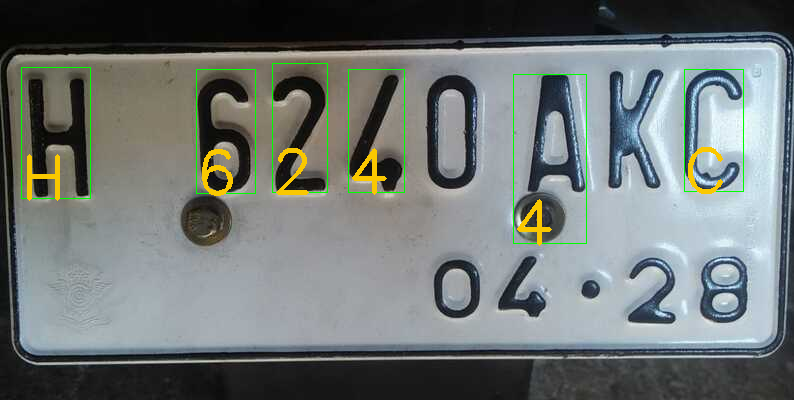

H6244C


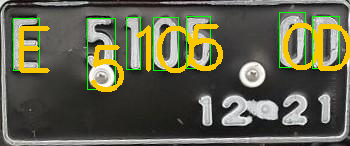

E51O5OD


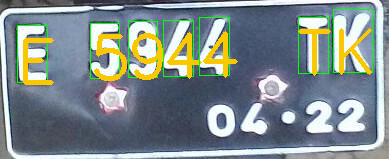

E5944TK


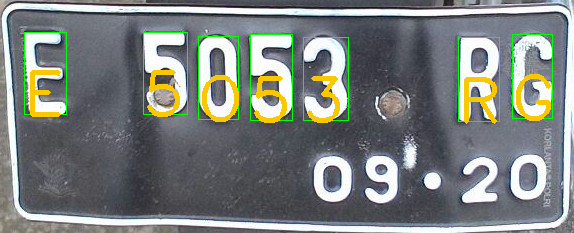

E5O53RG


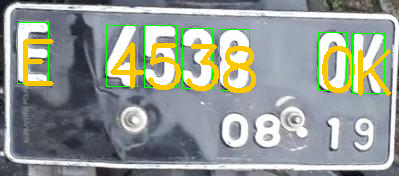

E45380K


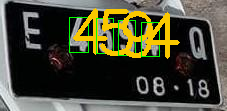

4594


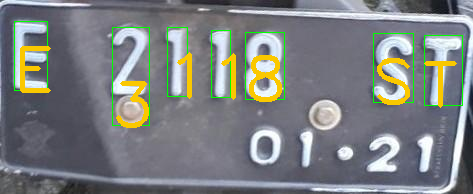

E3118ST


In [53]:
test = '/content/Automatic-License-Plate-Recognition/dataset/test'

for i in os.listdir(test):
  print(ocr(os.path.join(test, i)))